In [1]:
import pandas as pd
import numpy as np 


In [2]:
water_level_df = pd.read_csv('/home/nightwing/Codes/LSTM_for_waterlevel_prediction/Dataset/Data for Using LSTM for water level Forecating - Hourly Water level of Mai khola.csv')
# rainfall_df_illam = pd.read_csv('/content/Data for Using LSTM for water level Forecating - Ilam Tea State_AWS.csv')
rainfall_df_mai_beni = pd.read_csv('/home/nightwing/Codes/LSTM_for_waterlevel_prediction/Dataset/Data for Using LSTM for water level Forecating - Mai beni.csv')
rainfall_df_nayabazar = pd.read_csv('/home/nightwing/Codes/LSTM_for_waterlevel_prediction/Dataset/Data for Using LSTM for water level Forecating - Nayabazar - Namsaling.csv')
rainfall_df_pashupatinagar = pd.read_csv('/home/nightwing/Codes/LSTM_for_waterlevel_prediction/Dataset/Data for Using LSTM for water level Forecating - Pashupatinagar.csv')
rainfall_df_sandakpur_hilltop = pd.read_csv('/home/nightwing/Codes/LSTM_for_waterlevel_prediction/Dataset/Data for Using LSTM for water level Forecating - Sandakpur - Hilltop.csv')
rainfall_df_sandakpur_valley = pd.read_csv('/home/nightwing/Codes/LSTM_for_waterlevel_prediction/Dataset/Data for Using LSTM for water level Forecating - Sandakpur valley.csv')

In [3]:
water_level_df_station_name = "MAI KHOLA"
rainfall_df_mai_beni_station_name  = "MAI BENI"
rainfall_df_nayabazar_station_name = "NAYABAZAR"
rainfall_df_pashupatinagar_station_name = "PASHUPATINAGAR"
rainfall_df_sandakpur_valley_station_name = "SANDAKPUR VALLEY"
rainfall_df_sandakpur_valley_station_name = "SANDAKPUR VALLEY"

In [4]:
def rename_last_columns(dataset, location):
  last_column_name = dataset.columns[-1]
  new_column_name = f"Hourly rainfall at {location}"
  dataset = dataset.rename(columns= {last_column_name : new_column_name})
  return dataset

In [5]:
rainfall_df_mai_beni = rename_last_columns(rainfall_df_mai_beni,rainfall_df_mai_beni_station_name)
rainfall_df_mai_beni

,S.N,Date and time,Hourly rainfall at MAI BENI
0,23293,01-Nov-2021 0:45:00,0.0
1,23292,01-Nov-2021 1:45:00,0.0
2,23291,01-Nov-2021 2:45:00,0.0
3,23290,01-Nov-2021 3:45:00,0.0
4,23289,01-Nov-2021 4:45:00,0.0
...,...,...,...
23911,5308,24-Jul-2024 9:45:00,0.0
23912,5307,24-Jul-2024 10:45:00,0.0
23913,5306,24-Jul-2024 11:45:00,0.0
23914,5305,24-Jul-2024 12:45:00,0.0


In [6]:
rainfall_df_nayabazar = rename_last_columns(rainfall_df_nayabazar, rainfall_df_nayabazar_station_name)
rainfall_df_nayabazar.head()

,S.N,Date and time,Hourly rainfall at NAYABAZAR
0,22940,01-Nov-2021 0:45:00,0.0
1,22939,01-Nov-2021 1:45:00,0.0
2,22938,01-Nov-2021 2:45:00,0.0
3,22937,01-Nov-2021 3:45:00,0.0
4,22936,01-Nov-2021 4:45:00,0.0


In [7]:
rainfall_df_pashupatinagar = rename_last_columns(rainfall_df_pashupatinagar, rainfall_df_pashupatinagar_station_name)
rainfall_df_pashupatinagar.head()

,S.N,Date and time,Hourly rainfall at PASHUPATINAGAR
0,21350,03-Nov-2021 3:45:00,3.0
1,21349,03-Nov-2021 4:45:00,0.0
2,21348,03-Nov-2021 10:45:00,0.0
3,21347,03-Nov-2021 11:45:00,1.2
4,21346,03-Nov-2021 12:45:00,1.0


In [8]:
rainfall_df_sandakpur_valley = rename_last_columns(rainfall_df_sandakpur_valley, rainfall_df_sandakpur_valley_station_name)
rainfall_df_sandakpur_valley.head()

,S.N,Date and time,Hourly rainfall at SANDAKPUR VALLEY
0,23264,01-Nov-2021 10:45:00,4.0
1,23263,01-Nov-2021 11:45:00,1.2
2,23262,01-Nov-2021 12:45:00,0.0
3,23261,01-Nov-2021 13:45:00,0.0
4,23260,01-Nov-2021 14:45:00,0.0


In [9]:
def drop_sn(dataset, column):
  dataset = dataset.drop(column, axis = 1)
  return dataset

In [10]:
rainfall_df_mai_beni = drop_sn(rainfall_df_mai_beni, "S.N")
rainfall_df_nayabazar = drop_sn(rainfall_df_nayabazar, "S.N")
rainfall_df_pashupatinagar = drop_sn(rainfall_df_pashupatinagar, "S.N")
# rainfall_df_sandakpur_hilltop = drop_sn(rainfall_df_sandakpur_hilltop, "S.N")
rainfall_df_sandakpur_valley = drop_sn(rainfall_df_sandakpur_valley, "S.N")

In [11]:
water_level_df = drop_sn(water_level_df, "S.N")
water_level_df = drop_sn(water_level_df, "Station")
water_level_df.head(5)

,Date,Water level inst
0,01-Nov-2021 0:45:00,1.76
1,01-Nov-2021 1:45:00,1.75
2,01-Nov-2021 2:45:00,1.74
3,01-Nov-2021 3:45:00,1.75
4,01-Nov-2021 4:45:00,1.75


In [12]:
def convert_to_standard_datetime(df, datetime_column):
    """
    Converts the specified date and time column of a DataFrame to a standard datetime format.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the date and time column.
        datetime_column (str): The name of the column with date and time data.

    Returns:
        pd.DataFrame: DataFrame with the date and time column converted to a standard datetime format.
    """
    try:
        # Attempt to convert to datetime using automatic format detection
        df[datetime_column] = pd.to_datetime(df[datetime_column])
    except Exception as e:
        print(f"Automatic conversion failed: {e}")

        # Handle specific known formats
        formats = [
            '%d %b %Y %H:%M:%S',  # e.g., "16 Apr 2022 0:45:00"
            '%m/%d/%Y %H:%M:%S',  # e.g., "01/31/2020 18:00:00"
            '%d-%b-%Y %H:%M:%S',  # e.g., "01-Nov-2021 0:45:00"
            '%d-%m-%Y %H:%M:%S'   # e.g., "01-11-2021 0:45:00"
        ]

        for fmt in formats:
            try:
                df[datetime_column] = pd.to_datetime(df[datetime_column], format=fmt)
                break
            except ValueError:
                continue

    # Ensure the column is of datetime type
    df[datetime_column] = pd.to_datetime(df[datetime_column])

    # Rename the column to 'Timestamp' for consistency
    df.rename(columns={datetime_column: 'Timestamp'}, inplace=True)

    return df


In [13]:
# rainfall_df_illam = convert_to_standard_datetime(rainfall_df_illam, 'Data and time')
rainfall_df_mai_beni = convert_to_standard_datetime(rainfall_df_mai_beni, 'Date and time')
rainfall_df_nayabazar = convert_to_standard_datetime(rainfall_df_nayabazar, 'Date and time')
rainfall_df_pashupatinagar = convert_to_standard_datetime(rainfall_df_pashupatinagar, 'Date and time')
# rainfall_df_sandakpur_hilltop = convert_to_standard_datetime(rainfall_df_sandakpur_hilltop, 'Date and time')
rainfall_df_sandakpur_valley = convert_to_standard_datetime(rainfall_df_sandakpur_valley, 'Date and time')
water_level_df = convert_to_standard_datetime(water_level_df, 'Date')

In [14]:
#finding a common time stamps for all the dataframes based on time.
common_start = max(rainfall_df_sandakpur_valley['Timestamp'].min(), rainfall_df_pashupatinagar['Timestamp'].min(), rainfall_df_mai_beni['Timestamp'].min(), rainfall_df_nayabazar['Timestamp'].min(),water_level_df['Timestamp'].min())
#finding a common time stamps for all the dataframes based on time.
common_end = min(rainfall_df_sandakpur_valley['Timestamp'].max(), rainfall_df_pashupatinagar['Timestamp'].max(), rainfall_df_mai_beni['Timestamp'].max(), rainfall_df_nayabazar['Timestamp'].max(),water_level_df['Timestamp'].max())

In [15]:
print(common_start)
print(common_end)

2021-11-03 03:45:00
2024-07-22 00:45:00


In [16]:
import pandas as pd

def filter_dataframes_by_timerange(dataframes, start_time, end_time):
    """
    Filter multiple dataframes to include only rows between start_time and end_time.

    Parameters:
    dataframes (list): List of pandas DataFrames to filter
    start_time (pd.Timestamp): Start time for filtering
    end_time (pd.Timestamp): End time for filtering

    Returns:
    list: List of filtered DataFrames
    """
    filtered_dataframes = []
    for df in dataframes:
        filtered_df = df[(df['Timestamp'] >= start_time) & (df['Timestamp'] <= end_time)]
        filtered_dataframes.append(filtered_df)
    return filtered_dataframes


# List of dataframes to filter
dataframes_to_filter = [
    rainfall_df_sandakpur_valley,
    # rainfall_df_sandakpur_hilltop,
    rainfall_df_pashupatinagar,
    rainfall_df_mai_beni,
    rainfall_df_nayabazar,
    water_level_df
]

# Filter the dataframes
filtered_dataframes = filter_dataframes_by_timerange(dataframes_to_filter, common_start, common_end)

# Assign the filtered dataframes back to their original variable names
rainfall_df_sandakpur_valley, rainfall_df_pashupatinagar, \
rainfall_df_mai_beni, rainfall_df_nayabazar, water_level_df = filtered_dataframes

# Optionally, check the new date ranges of each dataframe
for df, name in zip(filtered_dataframes, ['Sandakpur Valley', 'Pashupatinagar', 'Mai Beni', 'Nayabazar', 'Water Level']):
    print(f"{name} date range: {df['Timestamp'].min()} to {df['Timestamp'].max()}")

Sandakpur Valley date range: 2021-11-03 03:45:00 to 2024-07-22 00:45:00
Pashupatinagar date range: 2021-11-03 03:45:00 to 2024-07-22 00:45:00
Mai Beni date range: 2021-11-03 03:45:00 to 2024-07-22 00:45:00
Nayabazar date range: 2021-11-03 03:45:00 to 2024-07-22 00:45:00
Water Level date range: 2021-11-03 03:45:00 to 2024-07-22 00:45:00


In [17]:
def set_datetime_index(df: pd.DataFrame, datetime_column: str) -> pd.DataFrame:
    """
    Converts a specified column to datetime format and sets it as the DataFrame index.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the datetime column.
    datetime_column (str): The name of the column to convert and set as the index.

    Returns:
    pd.DataFrame: The DataFrame with the datetime column as the index.
    """
    # Convert the specified column to datetime format
    df[datetime_column] = pd.to_datetime(df[datetime_column], errors='coerce')

    # Set the datetime column as the index
    df.set_index(datetime_column, inplace=True)

    # Sort the DataFrame by the index to ensure it's in chronological order
    df.sort_index(inplace=True)

    return df

In [18]:
rainfall_df_mai_beni = set_datetime_index(rainfall_df_mai_beni, 'Timestamp')
rainfall_df_nayabazar = set_datetime_index(rainfall_df_nayabazar, 'Timestamp')
rainfall_df_pashupatinagar = set_datetime_index(rainfall_df_pashupatinagar, 'Timestamp')
# rainfall_df_sandakpur_hilltop = set_datetime_index(rainfall_df_sandakpur_hilltop, 'Timestamp')
rainfall_df_sandakpur_valley = set_datetime_index(rainfall_df_sandakpur_valley, 'Timestamp')
water_level_df = set_datetime_index(water_level_df, 'Timestamp')

/tmp/ipykernel_11316/296779887.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[datetime_column] = pd.to_datetime(df[datetime_column], errors='coerce')
/tmp/ipykernel_11316/296779887.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[datetime_column] = pd.to_datetime(df[datetime_column], errors='coerce')
/tmp/ipykernel_11316/296779887.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [19]:
combined_df = pd.concat([rainfall_df_mai_beni, rainfall_df_nayabazar,rainfall_df_pashupatinagar,rainfall_df_sandakpur_valley,water_level_df], axis=1)


In [20]:
combined_df.head()

,Hourly rainfall at MAI BENI,Hourly rainfall at NAYABAZAR,Hourly rainfall at PASHUPATINAGAR,Hourly rainfall at SANDAKPUR VALLEY,Water level inst
Timestamp,,,,,
2021-11-03 03:45:00,0.0,0.0,3.0,0.0,1.71
2021-11-03 04:45:00,0.0,0.0,0.0,0.0,1.70
2021-11-03 05:45:00,0.0,0.0,NaN,0.0,1.71
2021-11-03 06:45:00,0.0,0.0,NaN,0.0,1.71
2021-11-03 07:45:00,0.0,0.0,NaN,0.0,1.70


In [21]:
combined_df.isna().sum()

Hourly rainfall at MAI BENI              0
Hourly rainfall at NAYABAZAR           377
Hourly rainfall at PASHUPATINAGAR      366
Hourly rainfall at SANDAKPUR VALLEY     18
Water level inst                        17
dtype: int64

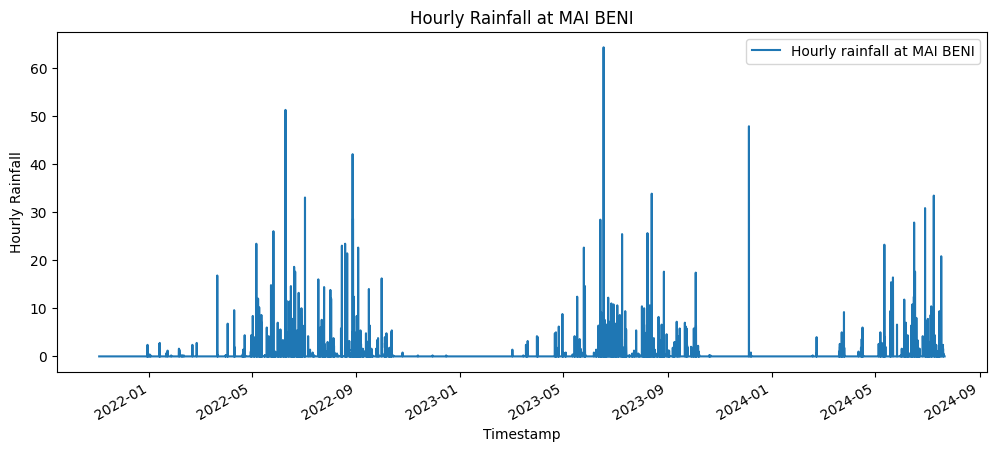

In [22]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

combined_df_reset = combined_df.reset_index()
combined_df_reset.plot(x='Timestamp', y='Hourly rainfall at MAI BENI', figsize=(12, 5), title="Hourly Rainfall at MAI BENI")
plt.xlabel("Timestamp")
plt.ylabel("Hourly Rainfall")
plt.show()


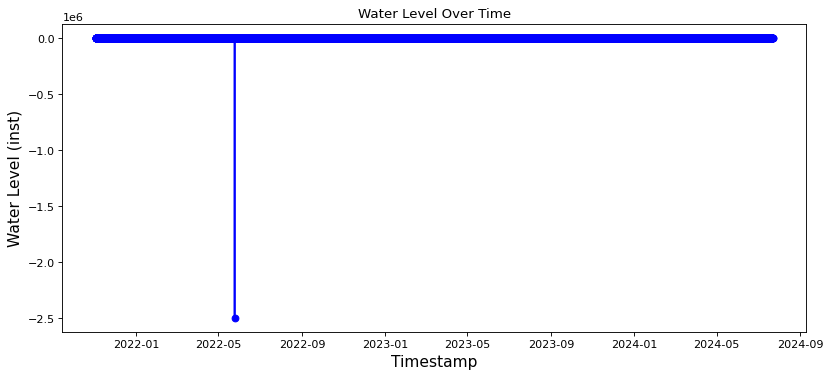

In [23]:
plt.figure(figsize=(12, 5), dpi=80, linewidth=2)
plt.plot(combined_df.index, combined_df['Water level inst'], marker='o', linestyle='-', color='b')

# Adding title and labels
plt.title('Water Level Over Time')
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('Water Level (inst)', fontsize=14)

# Displaying the plot
plt.show()

In [24]:
print(combined_df['Water level inst'].describe())


count    2.378700e+04
mean    -1.041564e+02
std      1.620950e+04
min     -2.499996e+06
25%      5.300000e-01
50%      7.900000e-01
75%      1.390000e+00
max      3.520000e+00
Name: Water level inst, dtype: float64


In [25]:
def remove_outliers_negative_values(df):
    cleaned_df = df[df['Water level inst']>0]
    for col in cleaned_df.columns:
        cleaned_df[col] = cleaned_df[col].where(cleaned_df[col]>=0, np.nan)
    return cleaned_df

In [26]:
cleaned_df = remove_outliers_negative_values(combined_df)

/tmp/ipykernel_11316/436308126.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[col] = cleaned_df[col].where(cleaned_df[col]>=0, np.nan)
/tmp/ipykernel_11316/436308126.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[col] = cleaned_df[col].where(cleaned_df[col]>=0, np.nan)
/tmp/ipykernel_11316/436308126.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [27]:
cleaned_df.isna().sum()

Hourly rainfall at MAI BENI              0
Hourly rainfall at NAYABAZAR           360
Hourly rainfall at PASHUPATINAGAR      366
Hourly rainfall at SANDAKPUR VALLEY      1
Water level inst                         0
dtype: int64

In [28]:
def interploate_missing_values_with_time(df: pd.DataFrame, method: str = 'time') -> pd.DataFrame:
    """
    Interpolates missing values in a DataFrame using the specified method.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame to interpolate.
    - method (str): The interpolation method to use. Default is 'time'.
    
    Returns:
    - pd.DataFrame: The DataFrame with interpolated values.
    """
    if method not in ['linear', 'time', 'index', 'nearest', 'polynomial', 'spline']:
        raise ValueError("Invalid interpolation method. Choose from 'linear', 'time', 'index', 'nearest', 'polynomial', 'spline'.")
    
    df.interpolate(method=method, inplace=True)
    return df


In [29]:
cleaned_df = interploate_missing_values_with_time(cleaned_df)

/tmp/ipykernel_11316/3909324907.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.interpolate(method=method, inplace=True)


In [30]:
cleaned_df

,Hourly rainfall at MAI BENI,Hourly rainfall at NAYABAZAR,Hourly rainfall at PASHUPATINAGAR,Hourly rainfall at SANDAKPUR VALLEY,Water level inst
Timestamp,,,,,
2021-11-03 03:45:00,0.0,0.0,3.0,0.0,1.71
2021-11-03 04:45:00,0.0,0.0,0.0,0.0,1.70
2021-11-03 05:45:00,0.0,0.0,0.0,0.0,1.71
2021-11-03 06:45:00,0.0,0.0,0.0,0.0,1.71
2021-11-03 07:45:00,0.0,0.0,0.0,0.0,1.70
...,...,...,...,...,...
2024-07-21 20:45:00,0.0,0.0,0.0,0.2,1.51
2024-07-21 21:45:00,0.0,0.0,0.0,0.4,1.53
2024-07-21 22:45:00,0.0,0.0,0.0,0.0,1.52


In [31]:
cleaned_df.describe()

,Hourly rainfall at MAI BENI,Hourly rainfall at NAYABAZAR,Hourly rainfall at PASHUPATINAGAR,Hourly rainfall at SANDAKPUR VALLEY,Water level inst
count,23786.000000,23786.000000,23786.000000,23786.000000,23786.000000
mean,0.161700,0.191297,0.213907,0.215244,0.942953
std,1.363702,1.395855,1.385820,1.256864,0.509990
min,0.000000,0.000000,0.000000,0.000000,0.280000
25%,0.000000,0.000000,0.000000,0.000000,0.530000
50%,0.000000,0.000000,0.000000,0.000000,0.790000
75%,0.000000,0.000000,0.000000,0.000000,1.390000
max,64.200000,50.800000,68.800000,34.200000,3.520000


In [32]:
data = cleaned_df.values

In [33]:
train_size = int(len(data) * 0.8)  
train, test = data[:train_size], data[train_size:]

In [34]:
print(f"The shape of train is {train.shape}\n\n  the shape of test is {test.shape}")

The shape of train is (19028, 5)

  the shape of test is (4758, 5)


In [35]:
from sklearn.preprocessing import MinMaxScaler
import joblib
# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the training data
train_scaled = scaler.fit_transform(train)


# Transform the test data
test_scaled = scaler.transform(test)

#Saving the scaler 

joblib.dump(scaler, 'scaler.save')


['scaler.save']

In [48]:
import numpy as np

def create_sequences(data, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(data) - n_steps_in - n_steps_out + 1):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        
        # Input sequence includes all 5 features (including target variable)
        seq_x = data[i:end_ix, :]
        
        # Output sequence is only the target variable for the next n_steps_out
        seq_y = data[end_ix:out_end_ix, -1]
        
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


In [49]:
n_steps_in, n_steps_out = 48, 4
trainX, trainY = create_sequences(train_scaled, n_steps_in, n_steps_out)
testX, testY = create_sequences(test_scaled, n_steps_in, n_steps_out)

In [50]:
print(f"The shape of the train_scaled is {train_scaled.shape}, the shape of the test_scaled is {test_scaled.shape}")
print(f"The shape of trainX is {trainX.shape}, the shape of testX is {testX.shape}")
print(f"The shape of trainY is {trainY.shape}, the shape of testY is {testY.shape}")

The shape of the train_scaled is (19028, 5), the shape of the test_scaled is (4758, 5)
The shape of trainX is (18977, 48, 5), the shape of testX is (4707, 48, 5)
The shape of trainY is (18977, 4), the shape of testY is (4707, 4)


In [51]:
trainX.shape

(18977, 48, 5)

In [52]:
print(train_scaled.shape)
print(test_scaled.shape)

(19028, 5)
(4758, 5)


In [53]:
trainX.shape[2]

5

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam



# Assuming train_scaled is a 3D array of shape (num_samples, 48, 5)
timesteps = trainX.shape[1]  # Should be 48
features = trainX.shape[2]   # Should be 5

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(timesteps, features)))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(n_steps_out))  # Assuming n_steps_out is the number of outputs (e.g., 1 for single-step prediction)
optimizer = Adam(learning_rate = 0.001)
model.compile(loss='mse', optimizer=optimizer)


/home/nightwing/anaconda3/envs/DL/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [55]:
history = model.fit(trainX, trainY, epochs=20, batch_size=32, validation_data=(testX, testY), verbose=1)


Epoch 1/20
594/594 ━━━━━━━━━━━━━━━━━━━━ 34s 50ms/step - loss: 0.0056 - val_loss: 0.0010
Epoch 2/20
594/594 ━━━━━━━━━━━━━━━━━━━━ 33s 55ms/step - loss: 0.0012 - val_loss: 8.1891e-04
Epoch 3/20
594/594 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - loss: 8.7884e-04 - val_loss: 8.0872e-04
Epoch 4/20
594/594 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - loss: 8.2013e-04 - val_loss: 7.0256e-04
Epoch 5/20
594/594 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - loss: 7.3079e-04 - val_loss: 7.1042e-04
Epoch 6/20
594/594 ━━━━━━━━━━━━━━━━━━━━ 32s 54ms/step - loss: 7.1002e-04 - val_loss: 7.6443e-04
Epoch 7/20
594/594 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - loss: 6.6251e-04 - val_loss: 8.0030e-04
Epoch 8/20
594/594 ━━━━━━━━━━━━━━━━━━━━ 32s 53ms/step - loss: 6.7905e-04 - val_loss: 5.7395e-04
Epoch 9/20
594/594 ━━━━━━━━━━━━━━━━━━━━ 32s 53ms/step - loss: 6.0830e-04 - val_loss: 6.3458e-04
Epoch 10/20
594/594 ━━━━━━━━━━━━━━━━━━━━ 32s 53ms/step - loss: 6.1285e-04 - val_loss: 5.6164e-04
Epoch 11/20
594/594 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/s

best_4_model_v2.h5 is the new model, the previous model has slight flaw in data preperation


In [56]:
import os 
if not os.path.exists('models'):
    os.makedir('models')
model.save('models/best_4_model_v2.h5')


In [57]:
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error
model = load_model('models/best_4_model_v2.h5', custom_objects={'mse':mean_squared_error})

In [58]:
trainX.shape

(18977, 48, 5)

In [59]:
trainX

array([[[0.        , 0.        , 0.04360465, 0.        , 0.4378882 ],
        [0.        , 0.        , 0.        , 0.        , 0.43478261],
        [0.        , 0.        , 0.        , 0.        , 0.4378882 ],
        ...,
        [0.        , 0.        , 0.        , 0.        , 0.42546584],
        [0.        , 0.        , 0.        , 0.        , 0.42546584],
        [0.        , 0.        , 0.        , 0.        , 0.42546584]],

       [[0.        , 0.        , 0.        , 0.        , 0.43478261],
        [0.        , 0.        , 0.        , 0.        , 0.4378882 ],
        [0.        , 0.        , 0.        , 0.        , 0.4378882 ],
        ...,
        [0.        , 0.        , 0.        , 0.        , 0.42546584],
        [0.        , 0.        , 0.        , 0.        , 0.42546584],
        [0.        , 0.        , 0.        , 0.        , 0.42546584]],

       [[0.        , 0.        , 0.        , 0.        , 0.4378882 ],
        [0.        , 0.        , 0.        , 0.        , 0.4

In [60]:
testX.shape

(4707, 48, 5)

148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step


In [63]:
def inverse_transform(data):
    # Create a dummy array to hold the full feature set for inverse transformation
    dummy_input = np.zeros((data.shape[0], data.shape[1], scaler.scale_.shape[0]))

    # Place data in the correct position (assuming target variable is last)
    dummy_input[:, :, -1] = data

    # Reshape for inverse transformation
    dummy_input_2d = dummy_input.reshape(-1, scaler.scale_.shape[0])

    # Inverse transform
    inv_transformed = scaler.inverse_transform(dummy_input_2d)

    # Extract the target variable
    return inv_transformed[:, -1].reshape(data.shape)
    

In [64]:
#Prediction and inverse transformation 
def prediction_inverse_transformation(model, X,y,scaler):
    """
    Predicts using the LSTM model and returns the actual (inverse transformed) values.

    Parameters:
    - model: Trained LSTM model.
    - X: Input sequences (e.g., testX).
    - Y: Actual target sequences (e.g., testY) for comparison.
    - scaler: MinMaxScaler used to scale the data.

    Returns:
    - actual: Inverse transformed actual values.
    - predicted: Inverse transformed predicted values.
    """
    predicted = model.predict(X)
    inv_predicted = inverse_transform(predicted)
    inv_actual = inverse_transform(y)

    return inv_actual, inv_predicted


In [71]:
actual_values, predicted_values = prediction_inverse_transformation(model, trainX, trainY, scaler)

594/594 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step


In [72]:
print("First sample of actual values :", actual_values[0])
print("First sample of predicted values:", predicted_values[0])

First sample of actual values : [1.67 1.67 1.66 1.67]
First sample of predicted values: [1.65791066 1.65156344 1.65340287 1.65286413]


In [70]:
actual_values

array([[1.67, 1.67, 1.66, 1.67],
       [1.67, 1.66, 1.67, 1.67],
       [1.66, 1.67, 1.67, 1.66],
       ...,
       [0.34, 0.34, 0.34, 0.33],
       [0.34, 0.34, 0.33, 0.44],
       [0.34, 0.33, 0.44, 0.46]])

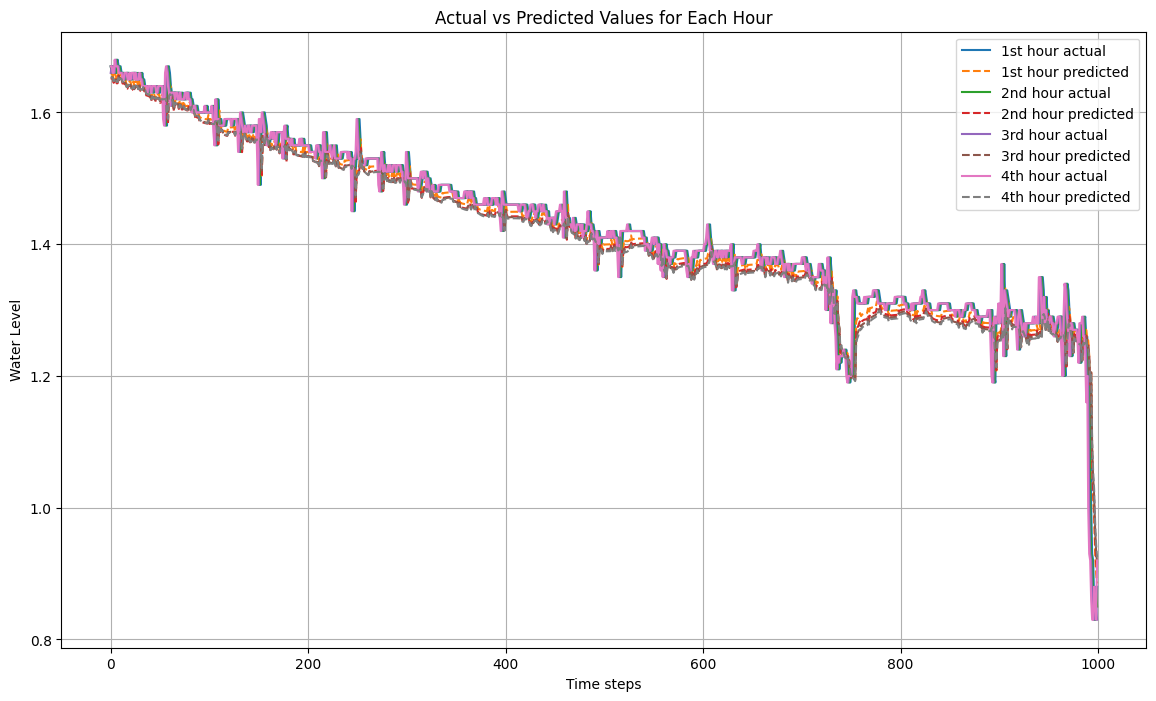

In [77]:
import matplotlib.pyplot as plt

def plot_predictions(testY_actual, testY_pred):
    hours = ['1st', '2nd', '3rd', '4th']
    
    plt.figure(figsize=(14, 8))
    
    for i in range(4):
        plt.plot(testY_actual[:, i], label=f'{hours[i]} hour actual')
        plt.plot(testY_pred[:, i], label=f'{hours[i]} hour predicted', linestyle='--')
    
    plt.title('Actual vs Predicted Values for Each Hour')
    plt.xlabel('Time steps')
    plt.ylabel('Water Level')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_predictions(actual_values[:1000], predicted_values[:1000])


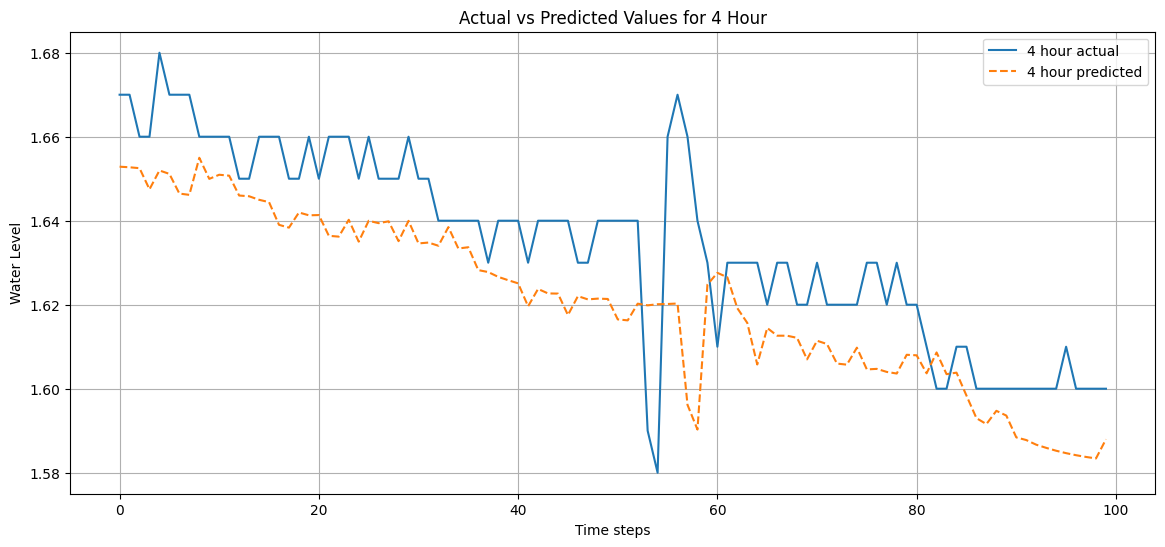

In [78]:
import matplotlib.pyplot as plt

def plot_specific_hour(testY_actual, testY_pred, hour):
    """
    Plot the actual vs predicted values for a specific hour.

    Parameters:
    - testY_actual: numpy array, actual values (shape: [samples, n_hours])
    - testY_pred: numpy array, predicted values (shape: [samples, n_hours])
    - hour: int, which hour to plot (1 for 1st hour, 2 for 2nd hour, etc.)
    """
    if hour < 1 or hour > testY_actual.shape[1]:
        raise ValueError(f"Hour must be between 1 and {testY_actual.shape[1]}")

    plt.figure(figsize=(14, 6))
    
    plt.plot(testY_actual[:, hour-1], label=f'{hour} hour actual')
    plt.plot(testY_pred[:, hour-1], label=f'{hour} hour predicted', linestyle='--')
    
    plt.title(f'Actual vs Predicted Values for {hour} Hour')
    plt.xlabel('Time steps')
    plt.ylabel('Water Level')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# To plot the 4th hour's actual and predicted values
plot_specific_hour(actual_values[:100], predicted_values[:100], hour=4)


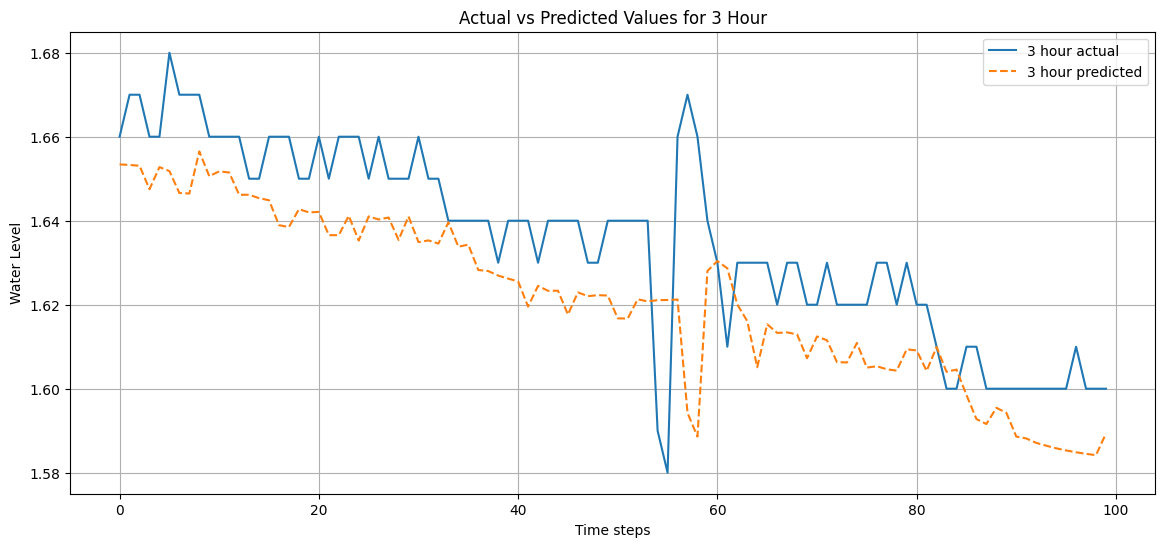

In [79]:
plot_specific_hour(actual_values[:100], predicted_values[:100], hour=3)

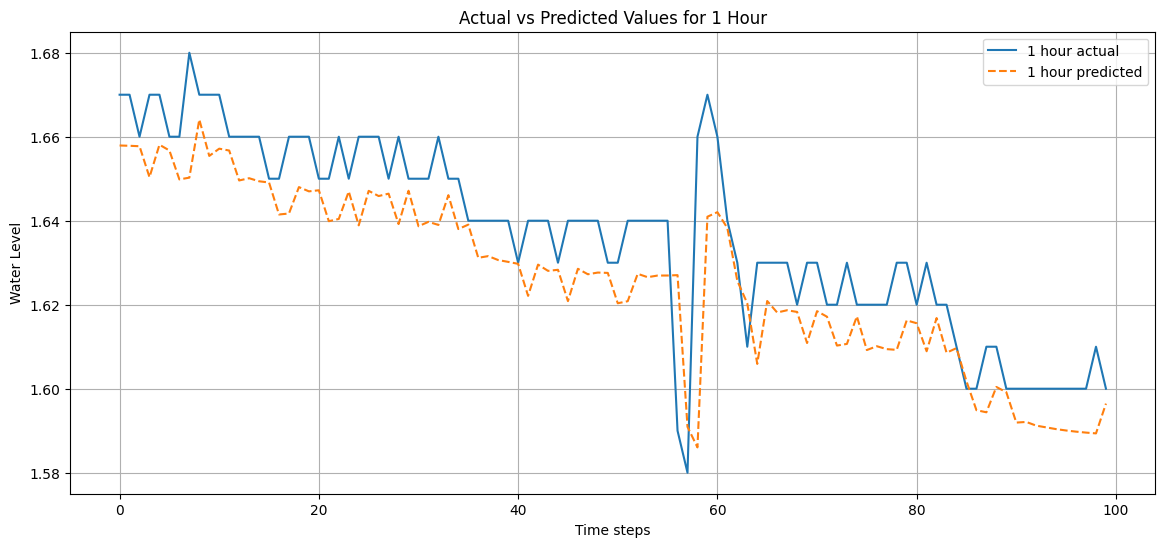

In [80]:
plot_specific_hour(actual_values[:100], predicted_values[:100], hour=1)

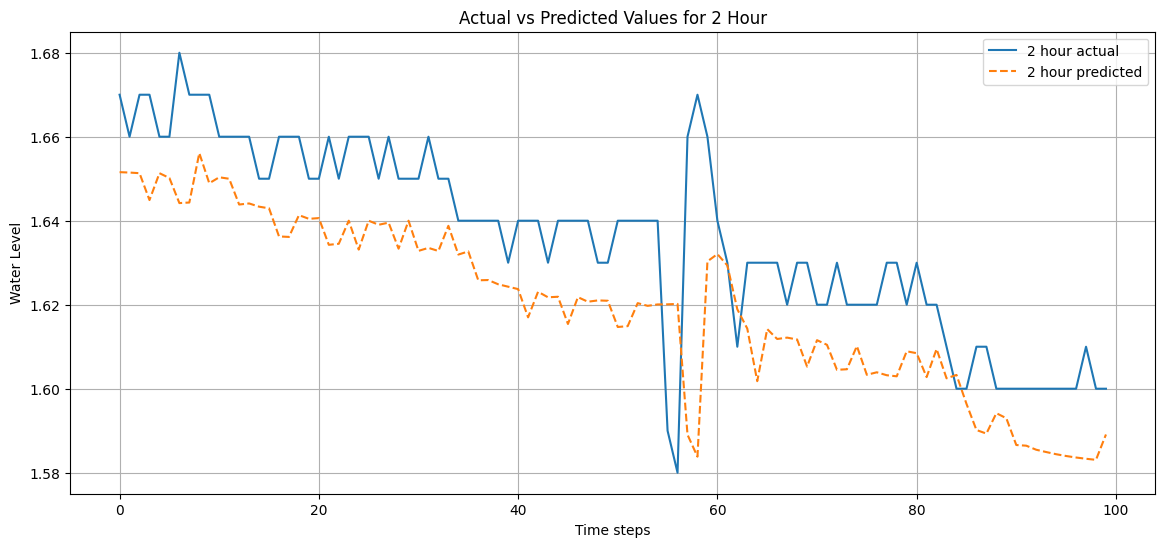

In [81]:
plot_specific_hour(actual_values[:100], predicted_values[:100], hour=2)

In [82]:
actual_values[:25]

array([[1.67, 1.67, 1.66, 1.67],
       [1.67, 1.66, 1.67, 1.67],
       [1.66, 1.67, 1.67, 1.66],
       [1.67, 1.67, 1.66, 1.66],
       [1.67, 1.66, 1.66, 1.68],
       [1.66, 1.66, 1.68, 1.67],
       [1.66, 1.68, 1.67, 1.67],
       [1.68, 1.67, 1.67, 1.67],
       [1.67, 1.67, 1.67, 1.66],
       [1.67, 1.67, 1.66, 1.66],
       [1.67, 1.66, 1.66, 1.66],
       [1.66, 1.66, 1.66, 1.66],
       [1.66, 1.66, 1.66, 1.65],
       [1.66, 1.66, 1.65, 1.65],
       [1.66, 1.65, 1.65, 1.66],
       [1.65, 1.65, 1.66, 1.66],
       [1.65, 1.66, 1.66, 1.66],
       [1.66, 1.66, 1.66, 1.65],
       [1.66, 1.66, 1.65, 1.65],
       [1.66, 1.65, 1.65, 1.66],
       [1.65, 1.65, 1.66, 1.65],
       [1.65, 1.66, 1.65, 1.66],
       [1.66, 1.65, 1.66, 1.66],
       [1.65, 1.66, 1.66, 1.66],
       [1.66, 1.66, 1.66, 1.65]])

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_metrics_for_hour(testY_actual, testY_pred, hour):
    """
    Calculate and print regression metrics for a specific hour.

    Parameters:
    - testY_actual: numpy array, actual values (shape: [samples, n_hours])
    - testY_pred: numpy array, predicted values (shape: [samples, n_hours])
    - hour: int, which hour to calculate metrics for (1 for 1st hour, 2 for 2nd hour, etc.)
    
    Returns:
    - metrics: dict, containing MAE, MSE, and R2 for the specified hour
    """
    if hour < 1 or hour > testY_actual.shape[1]:
        raise ValueError(f"Hour must be between 1 and {testY_actual.shape[1]}")

    actual = testY_actual[:, hour-1]
    predicted = testY_pred[:, hour-1]
    
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    
    metrics = {
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    }
    
    print(f"Metrics for {hour} Hour:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2): {r2}")
    
    return metrics


In [84]:

metrics_hour_4 = calculate_metrics_for_hour(actual_values, predicted_values, hour=4)
metric_hour_3 = calculate_metrics_for_hour(actual_values, predicted_values, 3)
metrics_hour_2 = calculate_metrics_for_hour(actual_values, predicted_values, 2)
metrics_hour_1 = calculate_metrics_for_hour(actual_values, predicted_values, 1)



Metrics for 4 Hour:
Mean Absolute Error (MAE): 0.047216158336450605
Mean Squared Error (MSE): 0.006330425155871064
R-squared (R2): 0.9731751634585492
Metrics for 3 Hour:
Mean Absolute Error (MAE): 0.042737954516715033
Mean Squared Error (MSE): 0.0050441579771955715
R-squared (R2): 0.9786261953674902
Metrics for 2 Hour:
Mean Absolute Error (MAE): 0.03721915449846021
Mean Squared Error (MSE): 0.003909908880356891
R-squared (R2): 0.9834327786771133
Metrics for 1 Hour:
Mean Absolute Error (MAE): 0.027435501146481106
Mean Squared Error (MSE): 0.0022343877035477223
R-squared (R2): 0.9905322919215527
